In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('/content/Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

# train and test datasets are sorted for plotting purpose
train = train.sort_values('time_study')
test = test.sort_values('time_study')

X_train, X_test = train[['time_study']], test[['time_study']]
y_train, y_test = train['Marks'], test['Marks']

In [ ]:
from sklearn.preprocessing import StandardScaler

### When using StandardScaler(), fit() method expects a 2D array-like input
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

### When using StandardScaler(), fit() method expects a 2D array-like input
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define kernel functions
def linear_kernel(X, Y):
    return np.dot(X, Y.T)

def polynomial_kernel(X, Y, degree=3, coef=1):
    return (np.dot(X, Y.T) + coef) ** degree

def rbf_kernel(X, Y, gamma=0.1):
    dist = np.linalg.norm(X[:, np.newaxis] - Y, axis=2) ** 2
    return np.exp(-gamma * dist)

In [ ]:
# SVR using Gradient Descent
class CustomSVR:
    def __init__(self, kernel='linear', C=1.0, epsilon=0.1, learning_rate=0.001, max_iter=1000):
        self.kernel = kernel
        self.C = C
        self.epsilon = epsilon
        self.lr = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y):
        self.X = X
        self.y = np.array(y).flatten()  # Ensure y is a numpy array and flatten it

        # Initialize alpha (Lagrange multipliers) as zeros
        self.alpha = np.zeros(X.shape[0])

        # Gradient Descent optimization
        for _ in range(self.max_iter):
            K = self.compute_kernel(X, X)
            gradient = self.C * np.dot(K, self.alpha) - self.y
            self.alpha -= self.lr * gradient

    def predict(self, X):
        K = self.compute_kernel(X, self.X)
        return np.dot(K, self.alpha)

    def compute_kernel(self, X1, X2):
        if self.kernel == 'linear':
            return linear_kernel(X1, X2)
        elif self.kernel == 'polynomial':
            return polynomial_kernel(X1, X2)
        elif self.kernel == 'rbf':
            return rbf_kernel(X1, X2)
        else:
            raise ValueError("Unsupported kernel")

In [ ]:
from sklearn.svm import SVR

svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

SVR(kernel='poly')

Text(0, 0.5, 'Marks')

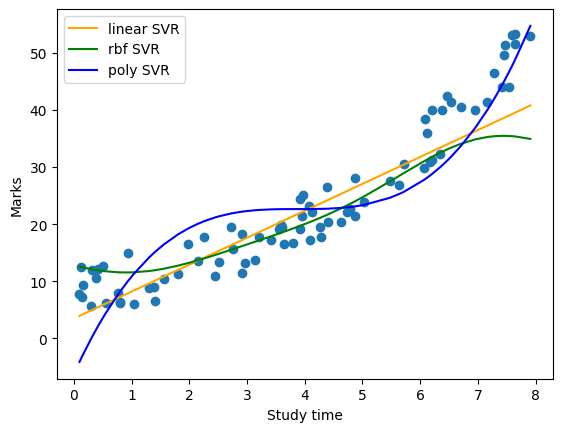

In [ ]:
from matplotlib import pyplot as plt

#### Model prediction for train dataset ####
train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)

#### Visualization ####
plt.scatter(train['time_study'], train['Marks'])
plt.plot(train['time_study'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['time_study'], train['rbf_svr_pred'], color = 'green', label = 'rbf SVR')
plt.plot(train['time_study'], train['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')